# Student Exam Performance Report

Author: PolyTech
Date: July 2025  

In this report, we analyze real-world exam performance data using NumPy, Pandas, and Matplotlib.  
We’ll inspect trends, clean the data, and visualize student results across Math, Reading, and Writing.

## Import Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read Data

In [6]:
df = pd.read_csv("StudentsPerformance.csv")  
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##  Inspect and Clean

In [7]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

###  Observations:
- Dataset includes gender, race, parental education, lunch type, test prep, and scores
- No missing data

##  Add Computed Columns (Pass/Fail)

In [8]:
df['Average Score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df['Passed'] = df['Average Score'] >= 75

##  Apply NumPy Operations (broadcasting, basic ops)

In [9]:
# Normalize scores out of 1 using broadcasting
df['Normalized'] = df['Average Score'] / 100

# Use np.where (NumPy + Pandas) for honor students
df['Honor Student'] = np.where(df['Average Score'] >= 90, True, False)

##  Visualizations

c:\PolyTech-Sample-Notebook\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


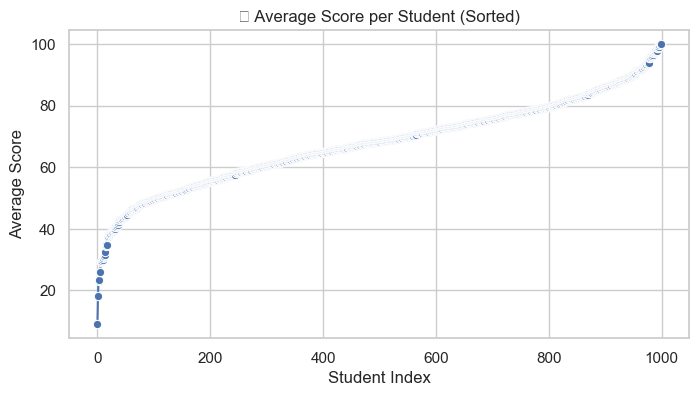

In [ ]:
sorted_df = df.sort_values(by='Average Score').reset_index()

#Line plot of Average Score per Student
plt.figure(figsize=(8, 4))
sns.lineplot(x=sorted_df.index, y='Average Score', data=sorted_df, marker='o')
plt.title("Average Score per Student (Sorted)")
plt.xlabel("Student Index")
plt.ylabel("Average Score")
plt.grid(True)
plt.show()
